In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='orange'>Practical 1: To study and apply Data Preprocessing and EDA techniques on given dataset.</font>

In [2]:
#Loading Dataset
bank_data = pd.read_csv('Datasets/bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Metadata: Bank client data:

1. Age (numeric)
2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

In [3]:
print('Shape: ', bank_data.shape)
bank_data.info()

Shape:  (11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
print('Categorical cols: ', list(bank_data.select_dtypes(include=['object']).columns))
print('Numerical cols: ', list(bank_data.select_dtypes(include=['int64', 'float64']).columns))
bank_data.describe()

Categorical cols:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Numerical cols:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
bank_data.apply(lambda x: x.nunique())

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [6]:
# Checking for values having names like unknown, other, etc.

print('unique in job: ', bank_data.job.value_counts())
print('unique in martial: ', bank_data.marital.value_counts())
print('unique in education: ', bank_data.education.value_counts())
print('unique in default: ', bank_data.default.value_counts()) 
print('unique in housing: ', bank_data.housing.value_counts())
print('unique in loan: ', bank_data.loan.value_counts())
print('unique in contact: ', bank_data.contact.value_counts())
print('unique in month: ', bank_data.month.value_counts())
print('unique in poutcome: ', bank_data.poutcome.value_counts())
print('unique in deposit: ', bank_data.deposit.value_counts())


unique in job:  job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
unique in martial:  marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
unique in education:  education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
unique in default:  default
no     10994
yes      168
Name: count, dtype: int64
unique in housing:  housing
no     5881
yes    5281
Name: count, dtype: int64
unique in loan:  loan
no     9702
yes    1460
Name: count, dtype: int64
unique in contact:  contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
unique in month:  month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     3

In [7]:
# Since poutcome has too many unknown values, we will drop this column
bank_data.drop('poutcome', axis=1, inplace=True)

# droping rows of job having unknown values
bank_data.drop(bank_data[bank_data['job'] == 'unknown'].index, inplace=True)

# Unknown values contact might be useful since people might have differnet means of contact
# Unknown values in education might be useful since people might have differnet education levels

<Axes: xlabel='age', ylabel='balance'>

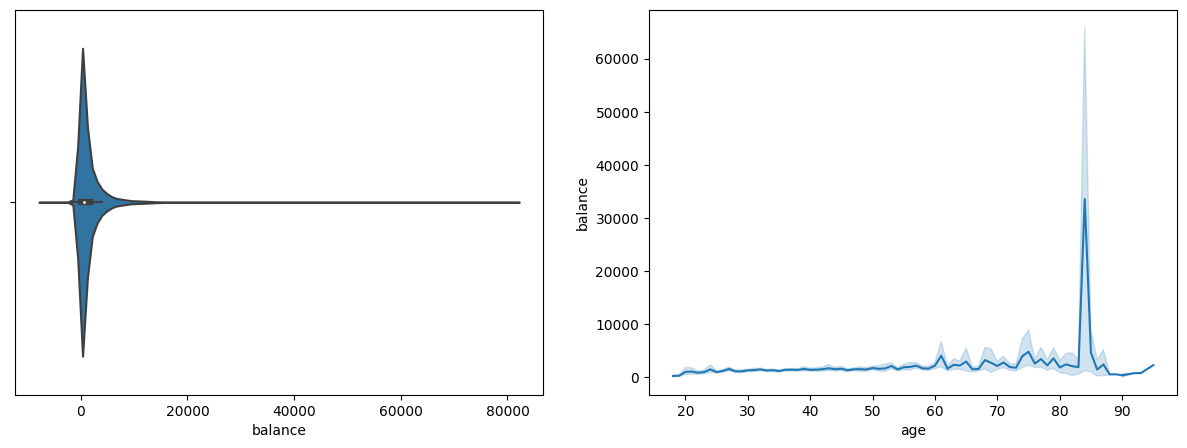

In [8]:
# identifying outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x=bank_data['balance'], ax=ax[0])
sns.lineplot(x='age', y='balance', data=bank_data, ax=ax[1])

In [9]:
# Checking for outliers in balance between age 80 and 90
print('Mean of balance: ', bank_data[(bank_data['age'] >= 80)]['balance'].mean())
bank_data[(bank_data['balance'] > 10000)].shape

Mean of balance:  4205.166666666667


(226, 16)

In [10]:
# Removing outliers
bank_data.drop(bank_data[(bank_data['balance'] > 10000)].index, inplace=True)

<Axes: xlabel='age', ylabel='balance'>

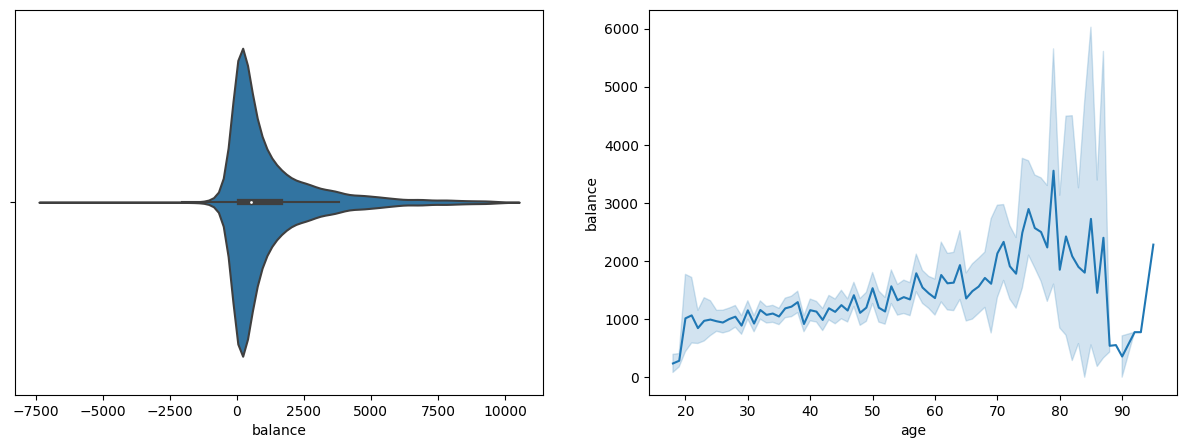

In [11]:
# Checking outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x=bank_data['balance'], ax=ax[0])
sns.lineplot(x='age', y='balance', data=bank_data, ax=ax[1])

<Axes: xlabel='age', ylabel='Count'>

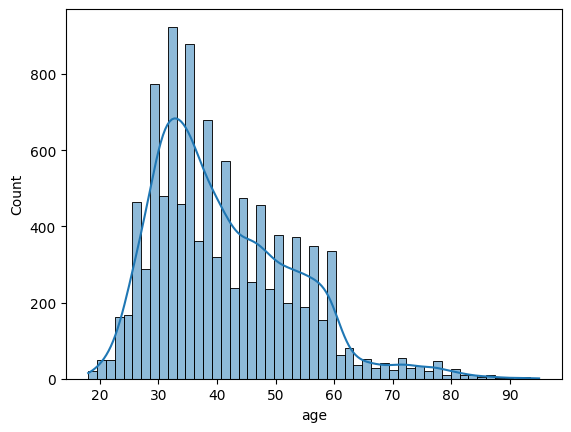

In [12]:
sns.histplot(x='age', data=bank_data, kde=True)

In [13]:
# categorizing age into 10 year groups
bank_data['age'] = pd.cut(bank_data['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80], right=False, labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])


In [14]:
bank_data['age'].value_counts()

age
31-40    4231
41-50    2549
51-60    1820
21-30    1501
61-70     458
71-80     217
11-20      21
Name: count, dtype: int64